In [7]:
from myst_nb import glue
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

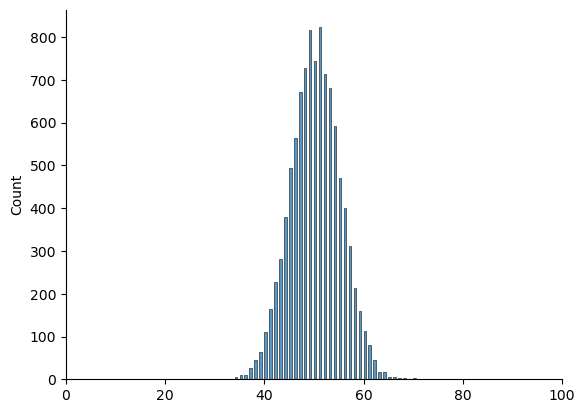

In [8]:
# sample from a binomial distribution
data = random.binomial(n=100, p=.5, size=10000)


esp = sns.histplot(data, bins=20,binwidth=0.5)
esp.set(xlim=(0,100))

sns.despine()

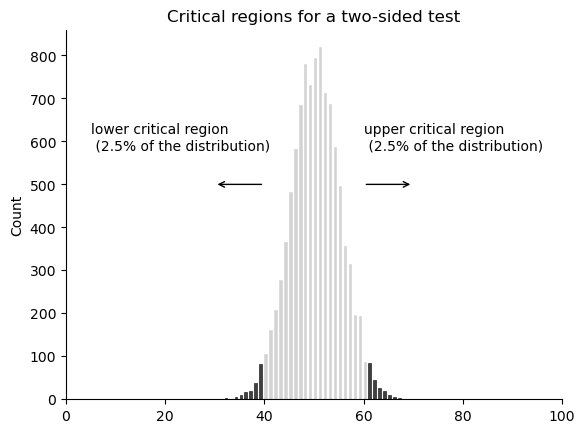

In [9]:
# sample from a binomial distribution
data = random.binomial(n=100, p=.5, size=10000)

# plot distribution and color critical region
ax = sns.histplot(data, bins=20,binwidth=.5, color="black")
ax.set_title("Critical regions for a two-sided test")
ax.annotate("", xy=(40, 500), xytext=(30, 500), arrowprops=dict(arrowstyle="<-"))
ax.annotate("lower critical region \n (2.5% of the distribution)", xy=(40, 600), xytext=(5, 580))
ax.annotate("", xy=(70, 500), xytext=(60, 500), arrowprops=dict(arrowstyle="->"))
ax.annotate("upper critical region \n (2.5% of the distribution)", xy=(70, 500), xytext=(60, 580))
ax.set(xlim=(0,100))
for p in ax.patches:
    if p.get_x() >= 40:
        if p.get_x() <= 60:
            p.set_color("lightgrey")


sns.despine()

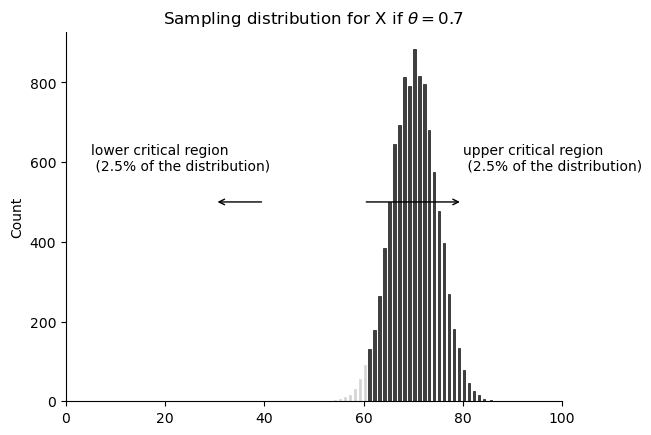

In [10]:
from scipy.stats import binom
from numpy import random

data = random.binomial(n=100, p=.7, size=10000)


# plot distribution and color critical region
ax = sns.histplot(data, bins=20,binwidth=.5, color="black")
ax.set_title("Sampling distribution for X if $\\theta = 0.7$")
ax.annotate("", xy=(40, 500), xytext=(30, 500), arrowprops=dict(arrowstyle="<-"))
ax.annotate("lower critical region \n (2.5% of the distribution)", xy=(40, 600), xytext=(5, 580))
ax.annotate("", xy=(80, 500), xytext=(60, 500), arrowprops=dict(arrowstyle="->"))
ax.annotate("upper critical region \n (2.5% of the distribution)", xy=(70, 500), xytext=(80, 580))
ax.set(xlim=(0,100))
for p in ax.patches:
    if p.get_x() >= 40:
        if p.get_x() <= 60:
            p.set_color("lightgrey")


sns.despine()


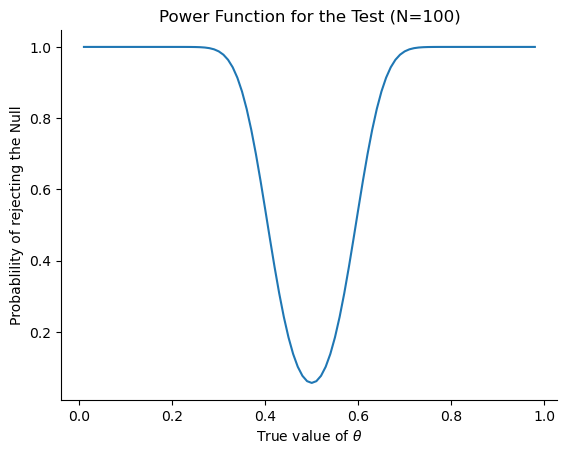

In [12]:
import numpy as np
theta = np.arange(0.01,.99,0.01)

n = 100 

prob = []
for k in theta:
    prob.append(binom.cdf(40,n, k) + 1 - binom.cdf(59,n, k))


#sns.lineplot(theta, prob_lower)
ax = sns.lineplot(x = theta, y = prob)
ax.set_title("Power Function for the Test (N=100)")
ax.set(xlabel='True value of $\\theta$', ylabel='Probablility of rejecting the Null')


sns.despine()

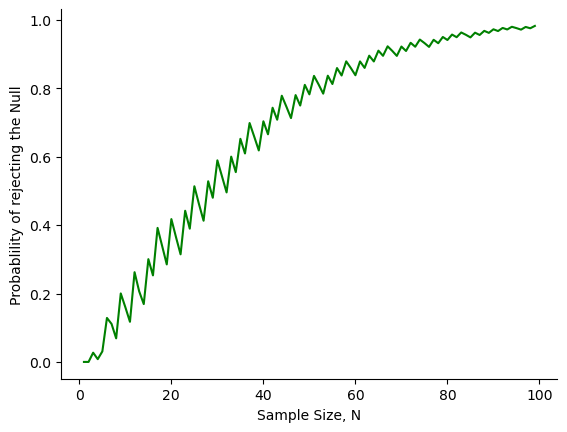

In [13]:
from scipy.stats import binom
size = list(range(1,100))
theta = 0.7

# qbinom(p, size, prob, lower.tail = TRUE, log.p = FALSE)
power = []
for n in size:
    critlo = binom.ppf(0.25,n,.5)-1
    crithi = binom.ppf(0.975,n,.5)
    power.append(binom.cdf(critlo,n,theta) + 1-binom.cdf(crithi,n,theta))

ax = sns.lineplot(x = size, y = power, color='green')
ax.set(xlabel = 'Sample Size, N', ylabel = 'Probablility of rejecting the Null')

sns.despine()